Question 3: How do customer behaviors vary across different segments?
Objective: Analyze patterns in product usage, transaction history, and digital
engagement among various customer segments.
Expected Outcome: Use insights to recommend targeted marketing approaches
for each segment.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import os
os.getcwd()
os.chdir('Data DSA3101')

In [26]:
customers = pd.read_csv("filtered_customers_with_clusters.csv")
transactions = pd.read_csv("transactions_summary.csv")
digital_usage = pd.read_csv("digital_usage.csv")

As data cleaning has been done for customers with clusters data, we are only merging tables here.

In [29]:
customer_data = customers.merge(transactions, on = "customer_id", how = "left")
customer_data = customer_data.merge(digital_usage, on = "customer_id", how = "left")

In [31]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9429 entries, 0 to 9428
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_id                      9429 non-null   int64  
 1   age                              9429 non-null   int64  
 2   job                              9429 non-null   object 
 3   marital                          9429 non-null   object 
 4   education                        9429 non-null   object 
 5   credit_default                   9429 non-null   int64  
 6   customer_segment                 9429 non-null   object 
 7   region                           9429 non-null   object 
 8   income                           9429 non-null   int64  
 9   credit_card                      9429 non-null   int64  
 10  personal_loan                    9429 non-null   int64  
 11  mortgage                         9429 non-null   int64  
 12  savings_account     

In [33]:
# Group by 'Cluster' and calculate summary statistics for numerical columns
numerical_columns = ['age', 'income']
numerical_summary = customer_data.groupby('Cluster')[numerical_columns].describe()

# Group by 'Cluster' and calculate the mode (most common value) for categorical columns
categorical_columns = ['marital', 'education', 'region']
categorical_summary = customer_data.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode()[0])

# Display numerical summary
print("Numerical Summary (Age and Income):")
print(numerical_summary)

# Display categorical summary
print("\nCategorical Summary (Marital, Education, and Region):")
print(categorical_summary)

Numerical Summary (Age and Income):
            age                                                      income  \
          count       mean        std   min   25%   50%   75%   max   count   
Cluster                                                                       
0        2243.0  55.206866  19.776742  21.0  38.0  61.0  68.0  99.0  2243.0   
1        6219.0  43.202766   9.487370  21.0  36.0  44.0  50.0  73.0  6219.0   
2         967.0  45.523268  12.315102  21.0  37.0  45.0  53.0  99.0   967.0   

                                                                            
                mean          std     min     25%     50%     75%      max  
Cluster                                                                     
0        2162.799376  1589.724248     0.0   818.5  2042.0  3036.5   9967.0  
1        3289.370478  1311.612115  1000.0  2500.0  3235.0  3923.5  11999.0  
2        7491.382627  1495.167586  3684.0  6261.0  7509.0  8746.0  14272.0  

Categorical Summary (Marit

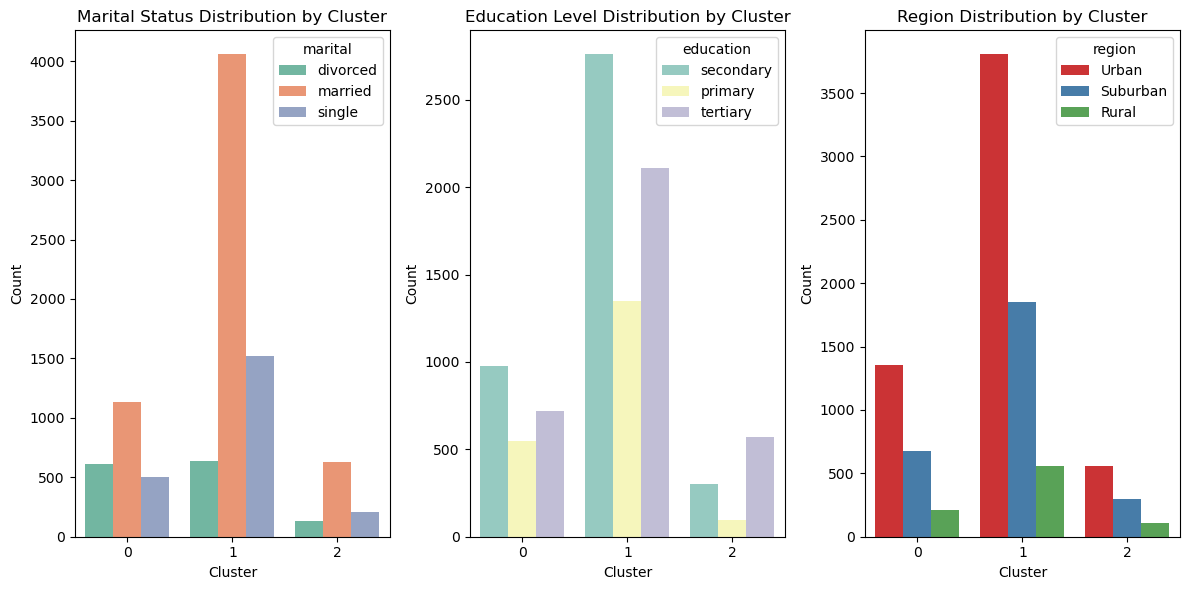

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_52044/2064895000.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='age', data=customer_data, palette='Set1')
/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_52044/2064895000.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='income', data=customer_data, palette='Set2')


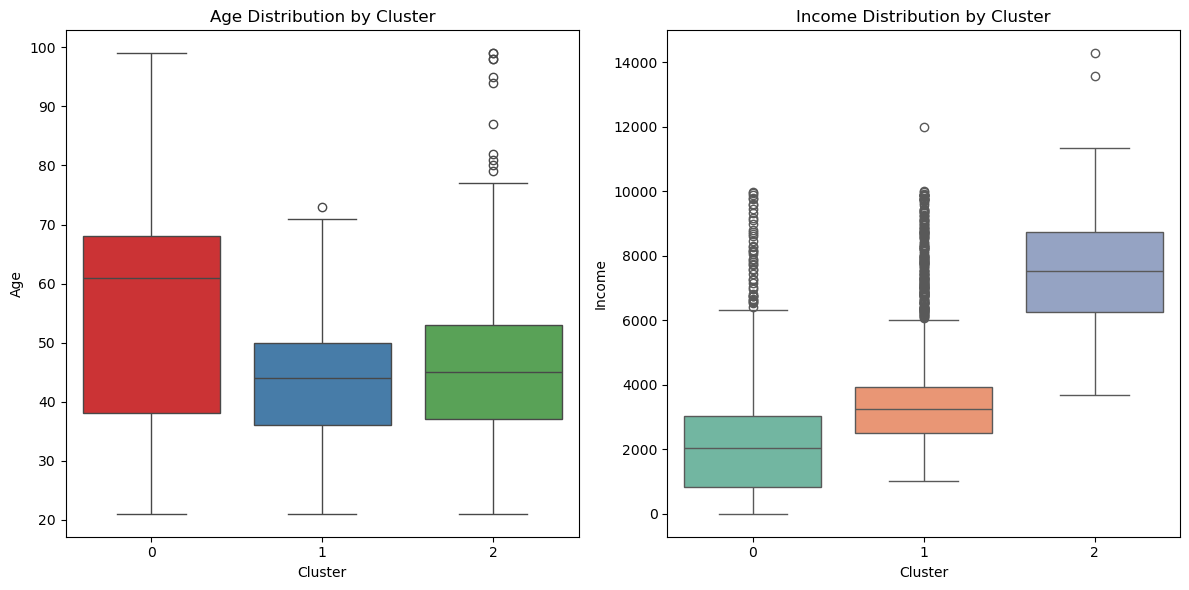

In [35]:
# Plot categorical variables (Marital, Education, Region) across clusters, with clusters on the x-axis
plt.figure(figsize=(12, 6))

# Marital Status Distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Cluster', hue='marital', data=customer_data, palette='Set2')
plt.title('Marital Status Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Education Level Distribution
plt.subplot(1, 3, 2)
sns.countplot(x='Cluster', hue='education', data=customer_data, palette='Set3')
plt.title('Education Level Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Region Distribution
plt.subplot(1, 3, 3)
sns.countplot(x='Cluster', hue='region', data=customer_data, palette='Set1')
plt.title('Region Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot boxplots for Age and Income by Cluster
plt.figure(figsize=(12, 6))

# Age Distribution
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='age', data=customer_data, palette='Set1')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')

# Income Distribution
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='income', data=customer_data, palette='Set2')
plt.title('Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')

plt.tight_layout()
plt.show()

Plot 0: Bar graph to show how many customers are in each cluster

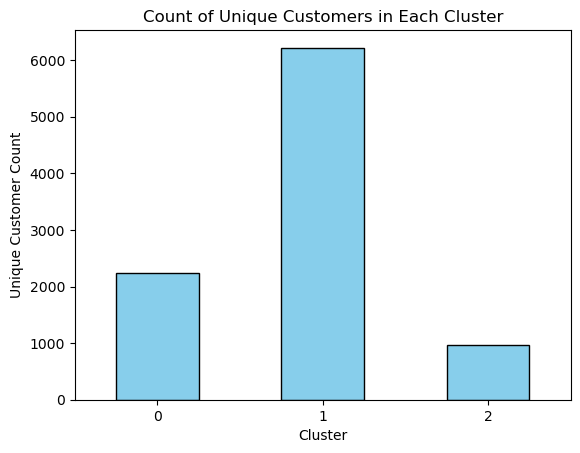

In [38]:
cluster_counts = customer_data.groupby("Cluster")["customer_id"].nunique()

# Plot
cluster_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Cluster")
plt.ylabel("Unique Customer Count")
plt.title("Count of Unique Customers in Each Cluster")
plt.xticks(rotation=0)
plt.show()

Plot 1: Bar graph of mean product usage across customer segments

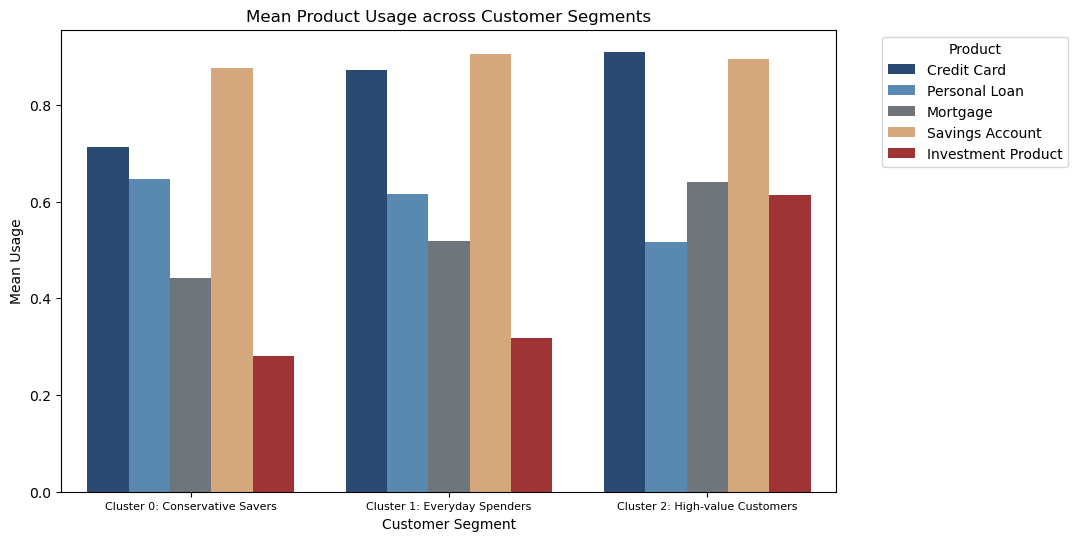

In [50]:
# Segment distribution
segment_distribution = customer_data['Cluster'].value_counts()

# Define the product columns
product_columns = ['credit_card', 'personal_loan', 'mortgage', 'savings_account', 'investment_product']

# Calculate mean product usage by segment
product_usage_by_segment = customer_data.groupby('Cluster')[product_columns].mean()

# Reset index to turn clusters into a column
product_usage_by_segment_reset = product_usage_by_segment.reset_index()

# Melt the DataFrame to long format for seaborn
df_melted = product_usage_by_segment_reset.melt(id_vars='Cluster', 
                                                var_name='Product', 
                                                value_name='Mean Usage')

# Rename products in the DataFrame
rename_dict = {
    'credit_card': 'Credit Card',
    'personal_loan': 'Personal Loan',
    'mortgage': 'Mortgage',
    'savings_account': 'Savings Account',
    'investment_product': 'Investment Product'
}
df_melted['Product'] = df_melted['Product'].replace(rename_dict)

# Define custom names for clusters
cluster_names = {
    0: 'Cluster 0: Conservative Savers',
    1: 'Cluster 1: Everyday Spenders',
    2: 'Cluster 2: High-value Customers'
}

# Map the cluster numbers to meaningful names
df_melted['Cluster'] = df_melted['Cluster'].replace(cluster_names)

# Set custom palette
custom_palette = ["#1F497D", "#4B8BBE", "#6C757D", "#E2A76F", "#B22222"]
sns.set_palette(custom_palette)

# Plot grouped bar chart with clusters on x-axis
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Cluster', y='Mean Usage', hue='Product')

# Adjust labels and title
plt.xticks(ha='center', fontsize=8)  # Adjust rotation and position of x-axis labels
plt.ylabel('Mean Usage')
plt.xlabel('Customer Segment')
plt.title('Mean Product Usage across Customer Segments')

# Adjust legend
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

Plot 2: Line graph of peak month distribution across different customer segments

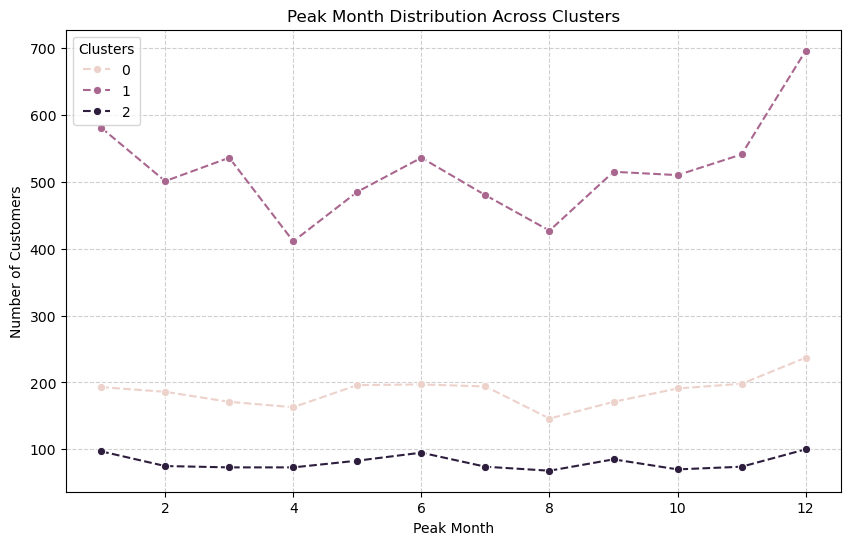

In [44]:
# Convert peak_month from numbers to abbreviated month names
peak_month_counts = customer_data.groupby(['Cluster', 'peak_month']).size().reset_index(name='count')

# Set professional color palette
custom_palette = ["#1F497D", "#4B8BBE", "#6C757D", "#E2A76F", "#B22222"]
sns.set_palette(custom_palette)

# Plot line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=peak_month_counts, x='peak_month', y='count', hue='Cluster', marker='o', linestyle="--")

# Adjust labels and title
plt.xlabel('Peak Month')
plt.ylabel('Number of Customers')
plt.title('Peak Month Distribution Across Clusters')
plt.legend(title='Clusters')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Plot 3: Bar Graphs of Peak Month Spending & Peak Month Frequency across customer segments

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_20358/3812883588.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=peak_month_data, x='Cluster', y='peak_month_spending', palette='Blues')
/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_20358/3812883588.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=peak_month_data, x='Cluster', y='peak_month_frequency', palette='Greens')


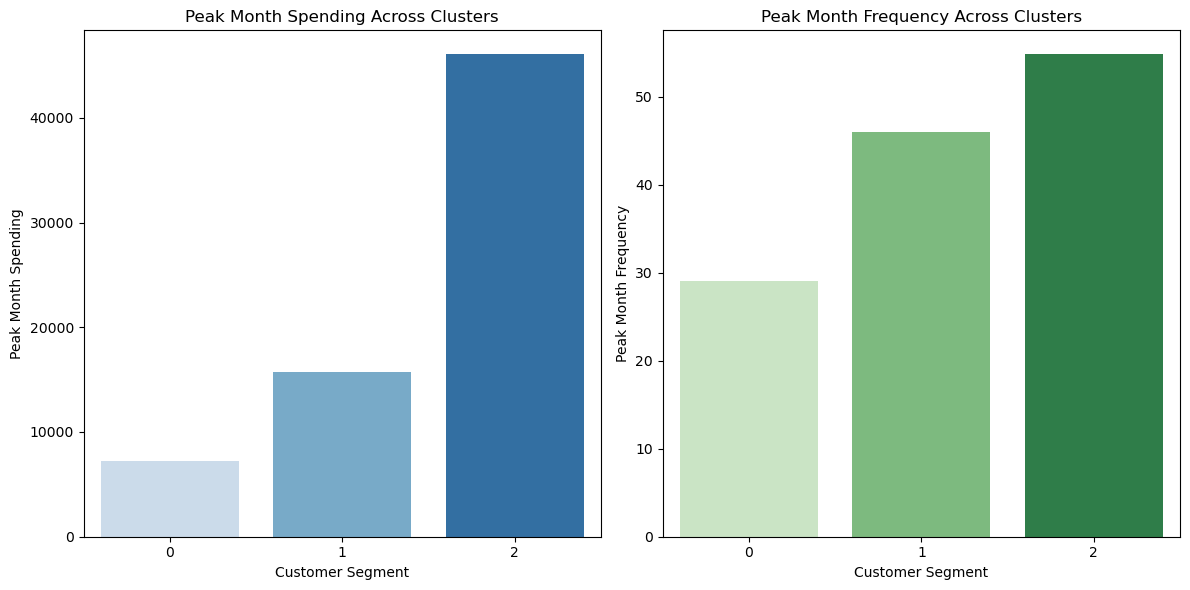

In [14]:
# Group data by customer segment and calculate the mean peak month spending and frequency
peak_month_data = customer_data.groupby('Cluster')[['peak_month_spending', 'peak_month_frequency']].mean().reset_index()

# Plot bar graph for peak month spending and frequency
plt.figure(figsize=(12, 6))

# Plot peak month spending
plt.subplot(1, 2, 1)
sns.barplot(data=peak_month_data, x='Cluster', y='peak_month_spending', palette='Blues')
plt.title('Peak Month Spending Across Clusters')
plt.ylabel('Peak Month Spending')
plt.xlabel('Customer Segment')

# Plot peak month frequency
plt.subplot(1, 2, 2)
sns.barplot(data=peak_month_data, x='Cluster', y='peak_month_frequency', palette='Greens')
plt.title('Peak Month Frequency Across Clusters')
plt.ylabel('Peak Month Frequency')
plt.xlabel('Customer Segment')

plt.tight_layout()
plt.show()

Plot 4: Boxplot of high-value transaction rate across customer segments

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_20358/1244389514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data, x='Cluster', y='high_value_transaction_rate_12m', palette='Set2')


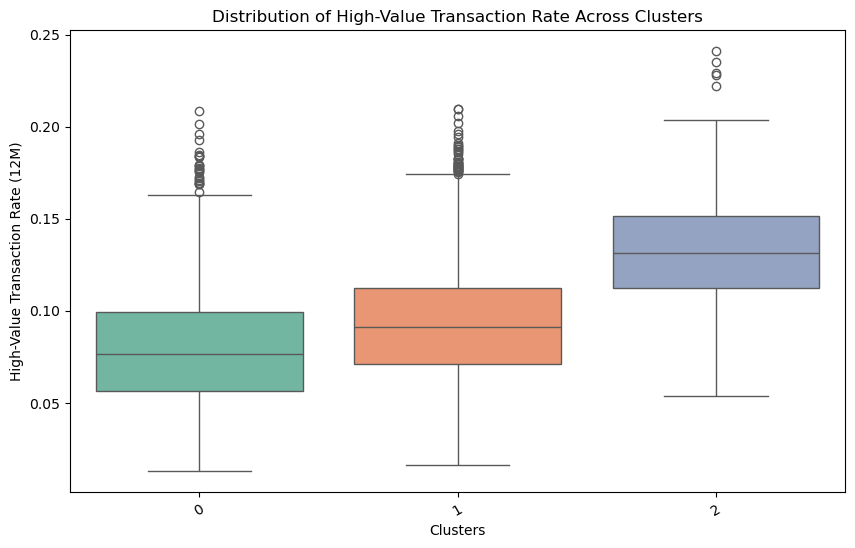

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_data, x='Cluster', y='high_value_transaction_rate_12m', palette='Set2')

plt.xlabel('Clusters')
plt.ylabel('High-Value Transaction Rate (12M)')
plt.title('Distribution of High-Value Transaction Rate Across Clusters')
plt.xticks(rotation=30)
plt.show()

Plot 5: Boxplot of online transaction ratio over the past 12 months across customer segments

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_20358/844221553.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data, x='Cluster', y='online_transaction_ratio_12m', palette='Set2')


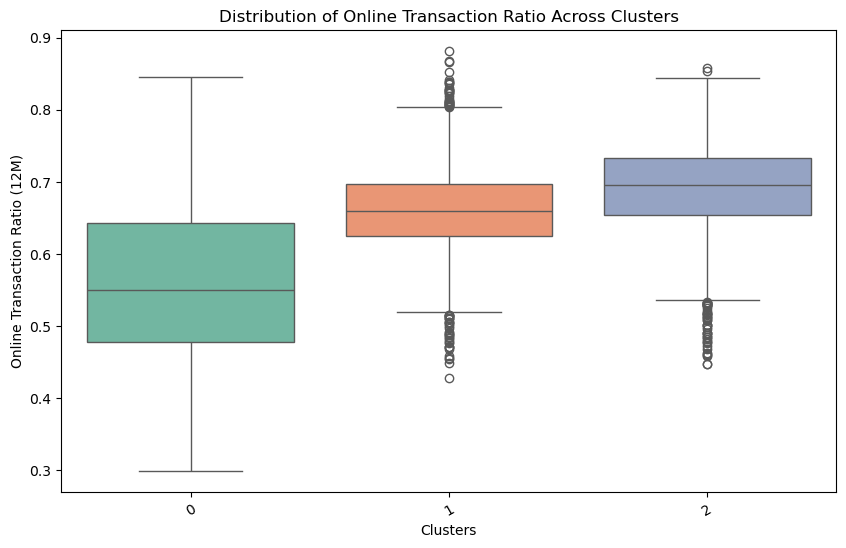

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_data, x='Cluster', y='online_transaction_ratio_12m', palette='Set2')

plt.xlabel('Clusters')
plt.ylabel('Online Transaction Ratio (12M)')
plt.title('Distribution of Online Transaction Ratio Across Clusters')
plt.xticks(rotation=30)
plt.show()

Plot 6: Bar graph for transaction frequency over 12 months by customer segment

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_20358/25635836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_data, x='Cluster', y='transaction_frequency_12m', palette='Set2')


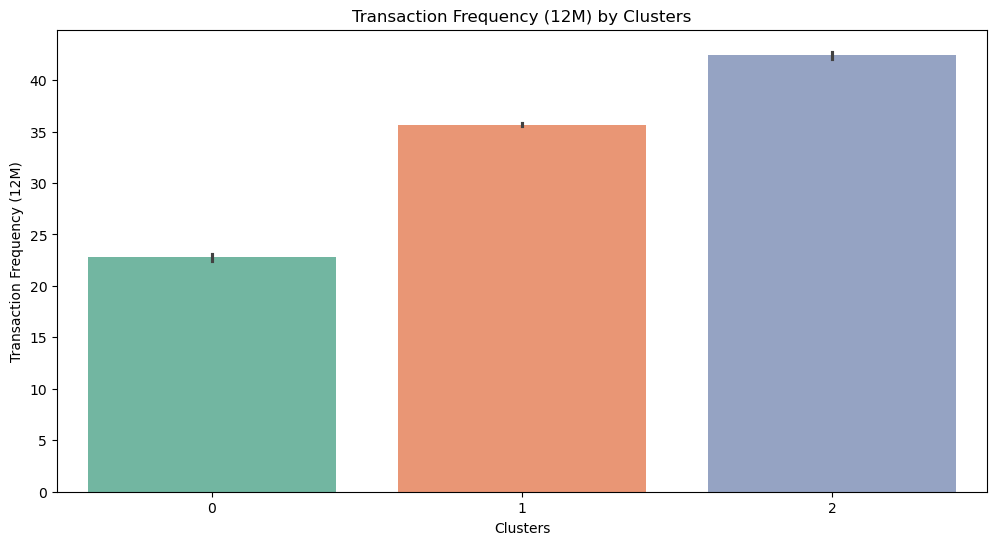

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_data, x='Cluster', y='transaction_frequency_12m', palette='Set2')

# Set the title and labels
plt.title('Transaction Frequency (12M) by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Transaction Frequency (12M)')
plt.show()

Plot 7: Bar graph for average transaction amount by customer segment

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_20358/84145383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_data, x='Cluster', y='average_transaction_amount_12m', palette='Set2')


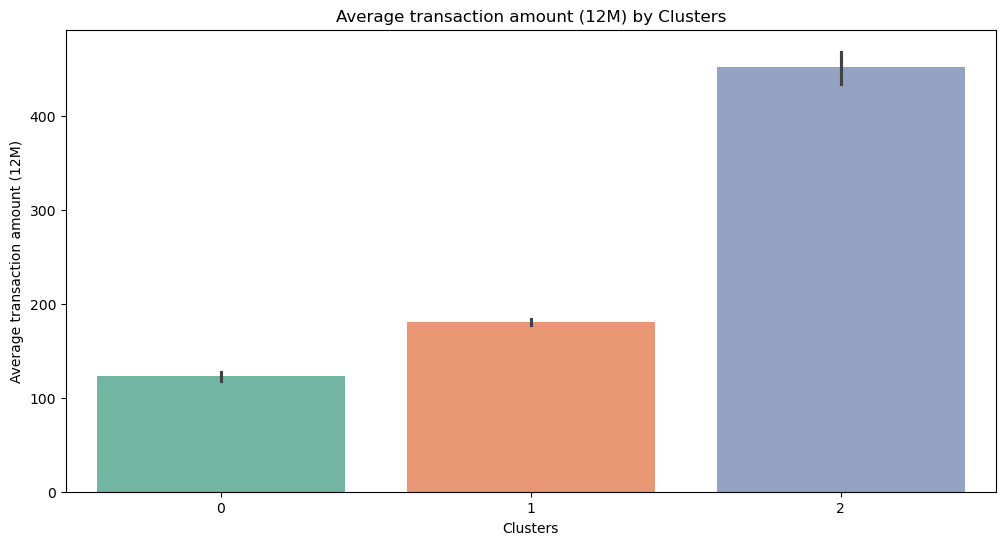

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_data, x='Cluster', y='average_transaction_amount_12m', palette='Set2')
# Set the title and labels
plt.title('Average transaction amount (12M) by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Average transaction amount (12M)')
plt.show()

Plot 8: Bar graph for total transaction amount by customer segments

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_20358/409892127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_data, x='Cluster', y='total_transaction_amount_12m', palette='Set2')


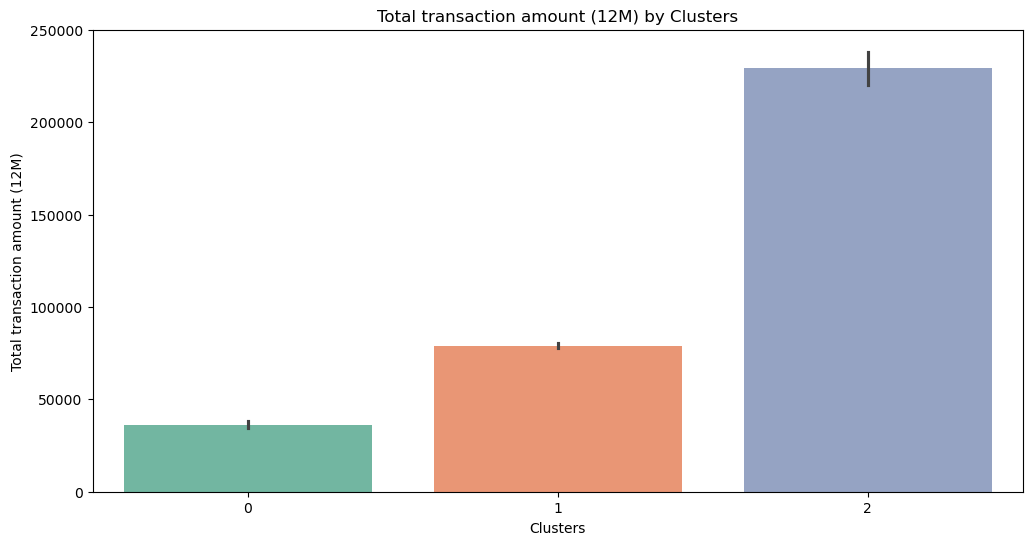

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_data, x='Cluster', y='total_transaction_amount_12m', palette='Set2')
# Set the title and labels
plt.title('Total transaction amount (12M) by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Total transaction amount (12M)')
plt.show()

Plot 9: Heatmap

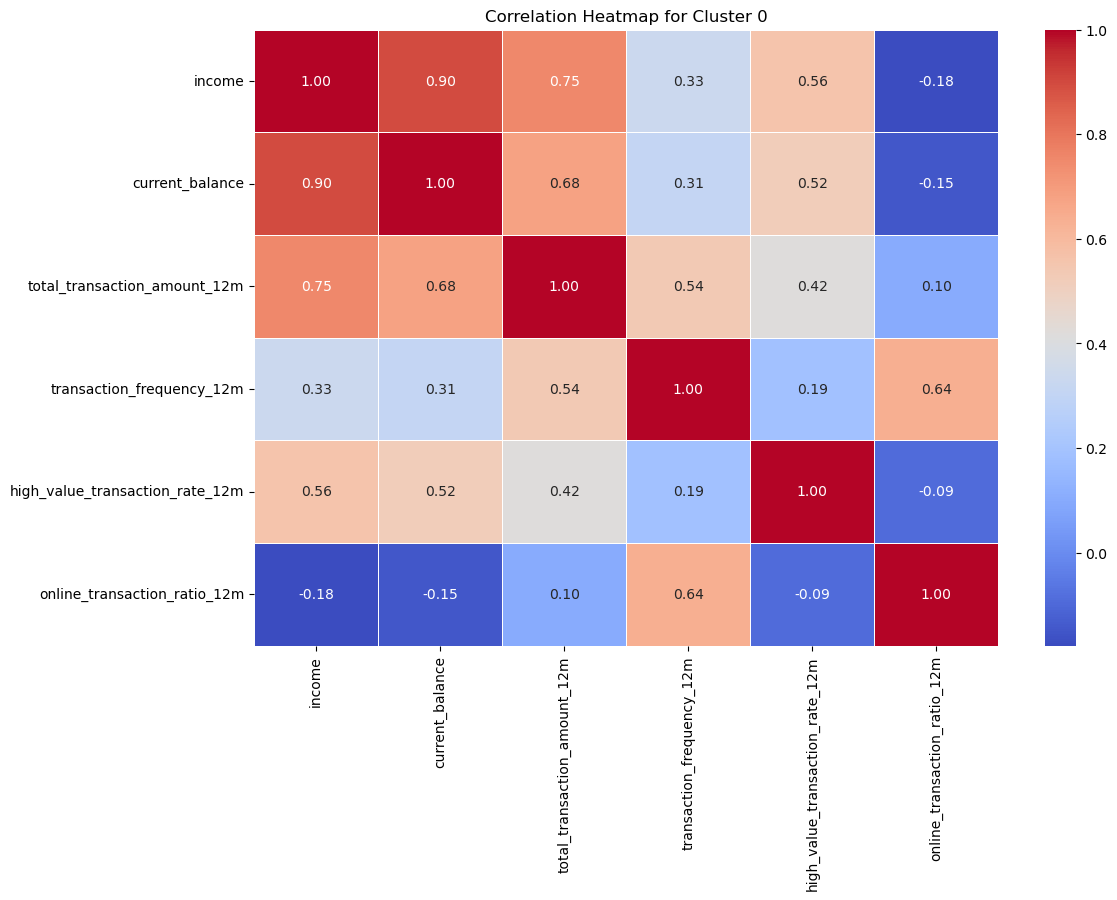

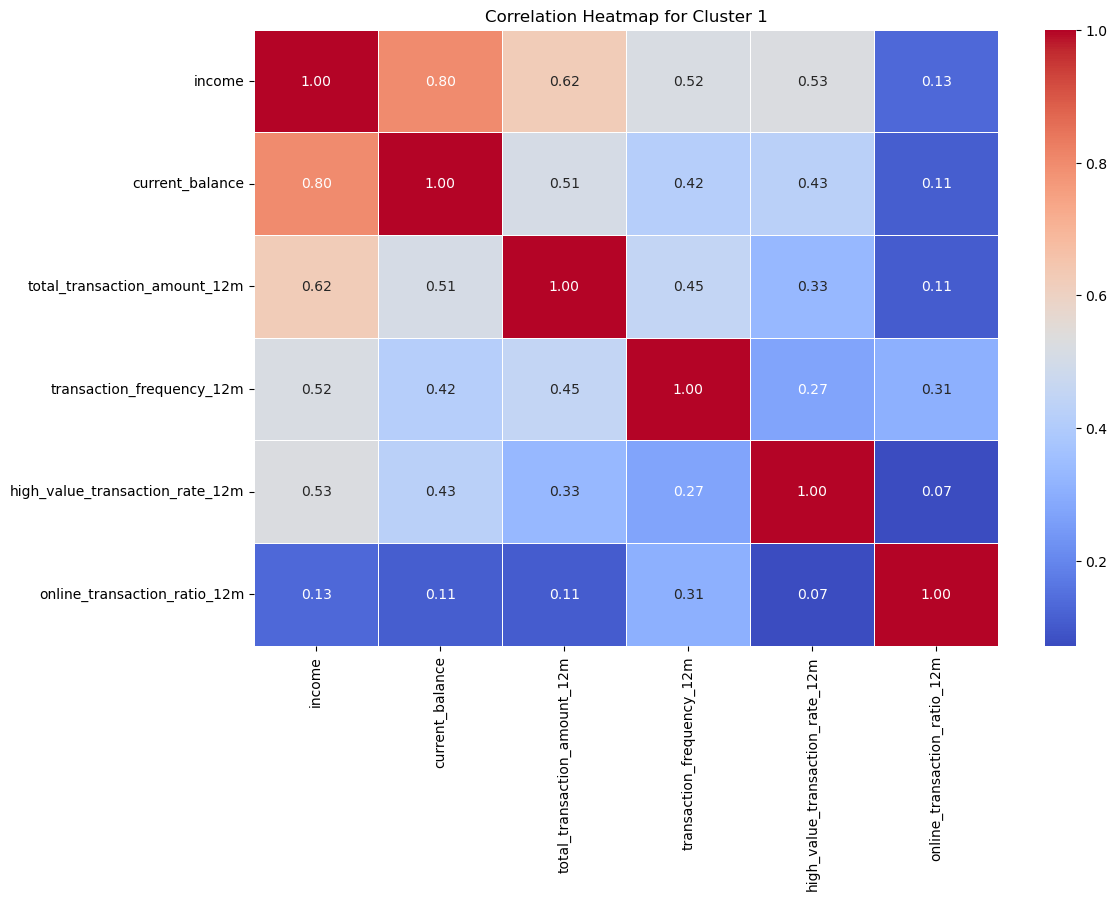

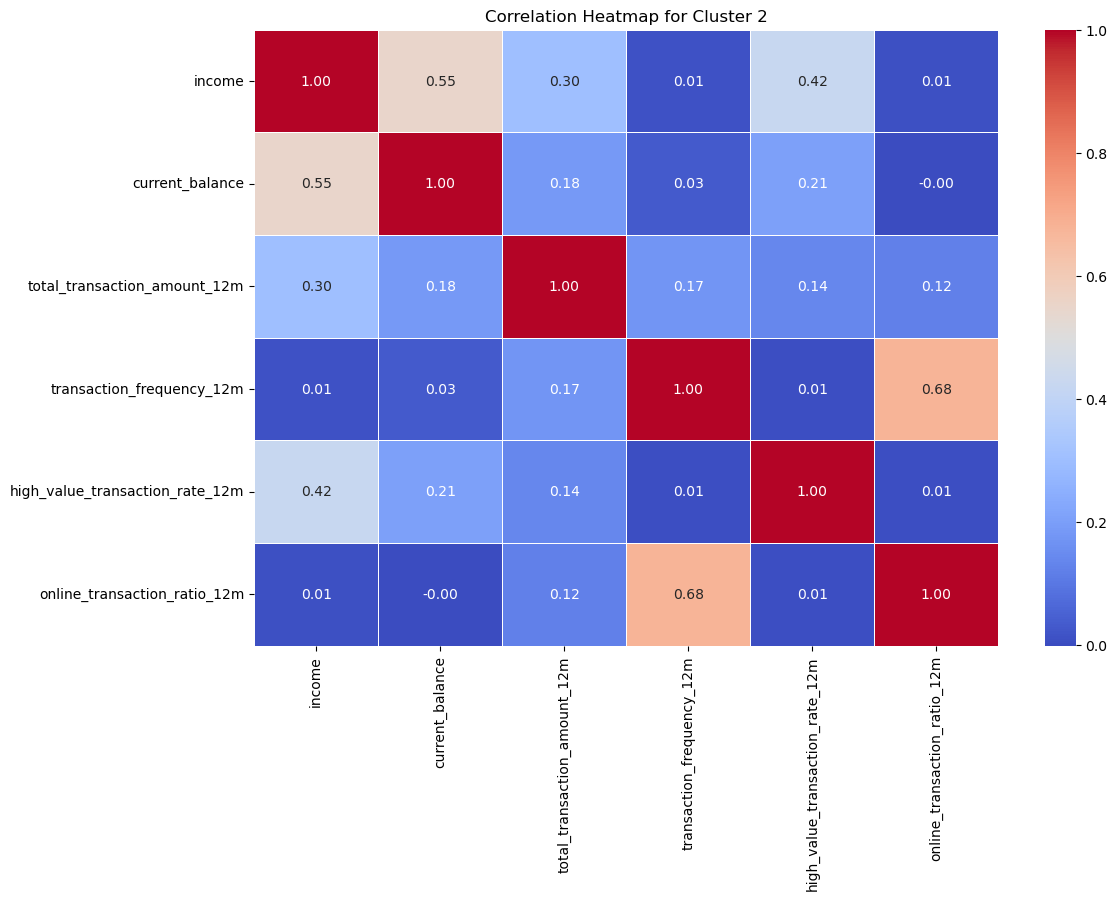

In [26]:
# Select relevant columns for correlation analysis
correlation_columns = ['income', 'current_balance', 'total_transaction_amount_12m',
                       'transaction_frequency_12m',
                       'high_value_transaction_rate_12m',
                       'online_transaction_ratio_12m']

# Sort clusters numerically before plotting
for cluster in sorted(customer_data['Cluster'].unique()):
    # Filter data for the current cluster
    cluster_data = customer_data[customer_data['Cluster'] == cluster]
    
    # Calculate the correlation matrix for the selected columns in the cluster
    correlation_matrix = cluster_data[correlation_columns].corr()
    
    # Plot the heatmap for the current cluster
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
    plt.title(f'Correlation Heatmap for Cluster {cluster}')
    plt.show()

Plot 10: 

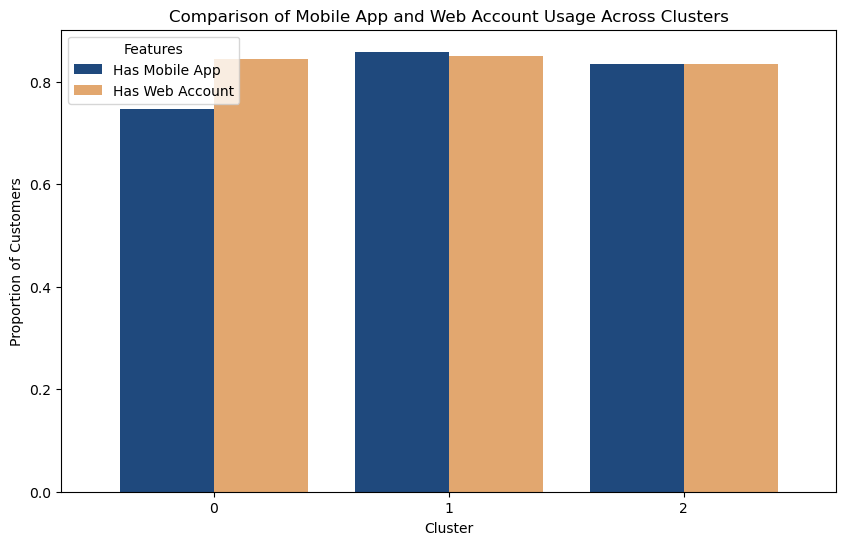

In [28]:
# Transform 'yes'/'no' into 1/0 for the columns has_mobile_app and has_web_account
customer_data['has_mobile_app'] = customer_data['has_mobile_app'].map({'Yes': 1, 'No': 0})
customer_data['has_web_account'] = customer_data['has_web_account'].map({'Yes': 1, 'No': 0})

# Group by 'Cluster' and calculate the mean for each column
cluster_summary = customer_data.groupby('Cluster')[['has_mobile_app', 'has_web_account']].mean().reset_index()

# Plot the bar graph
cluster_summary.plot(x='Cluster', kind='bar', figsize=(10, 6), color=['#1F497D', '#E2A76F'], width=0.8)

# Adjust the graph
plt.title('Comparison of Mobile App and Web Account Usage Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)  # Keep cluster labels horizontal
plt.legend(title='Features', labels=['Has Mobile App', 'Has Web Account'])

plt.show()

Plot 11:

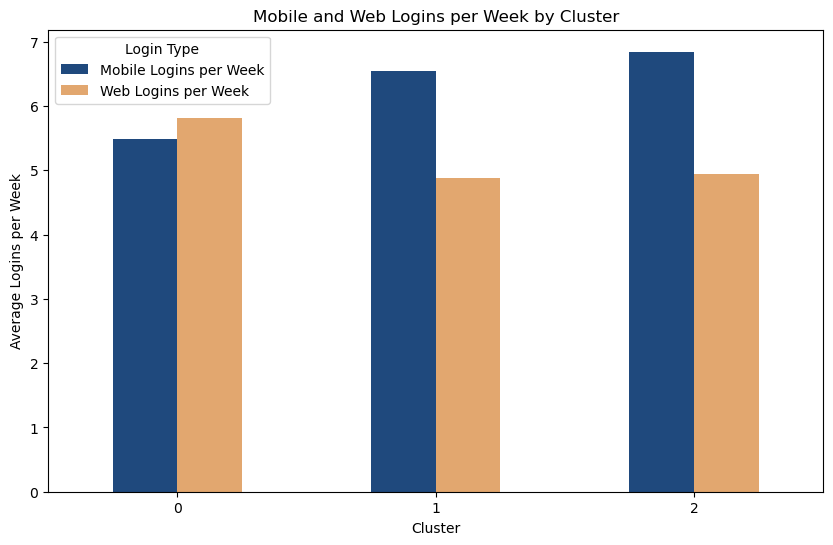

In [55]:
# Group by cluster and calculate the average mobile and web logins per week
cluster_logins = customer_data.groupby('Cluster')[['mobile_logins_per_week', 'web_logins_per_week']].mean()

# Plot the bar graph
cluster_logins.plot(kind='bar', figsize=(10, 6), color=['#1F497D', '#E2A76F'])

# Customize the graph
plt.title('Mobile and Web Logins per Week by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Logins per Week')
plt.xticks(rotation=0)  # Keep cluster labels horizontal for readability
plt.legend(title='Login Type', labels=['Mobile Logins per Week', 'Web Logins per Week'])
plt.show()

Plot 11:

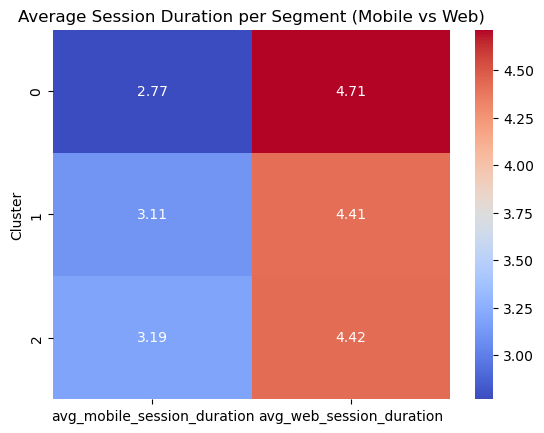

In [57]:
# Group by segment and calculate mean for avg session duration
session_duration = customer_data.groupby('Cluster')[['avg_mobile_session_duration', 'avg_web_session_duration']].mean()

# Plot the heatmap
sns.heatmap(session_duration, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Average Session Duration per Segment (Mobile vs Web)')
plt.show()

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_20358/2941117644.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='days_since_last_mobile_login', data=customer_data, palette='Set1')


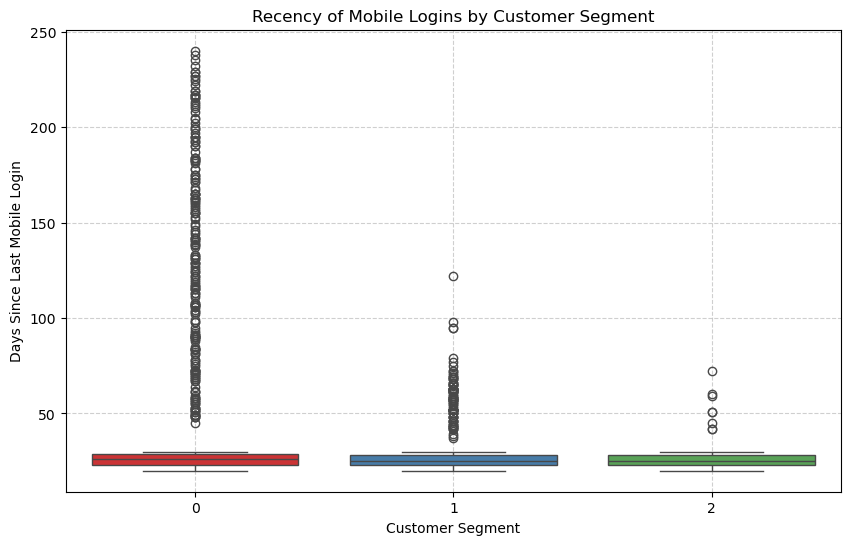

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_20358/2941117644.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='days_since_last_web_login', data=customer_data, palette='Set2')


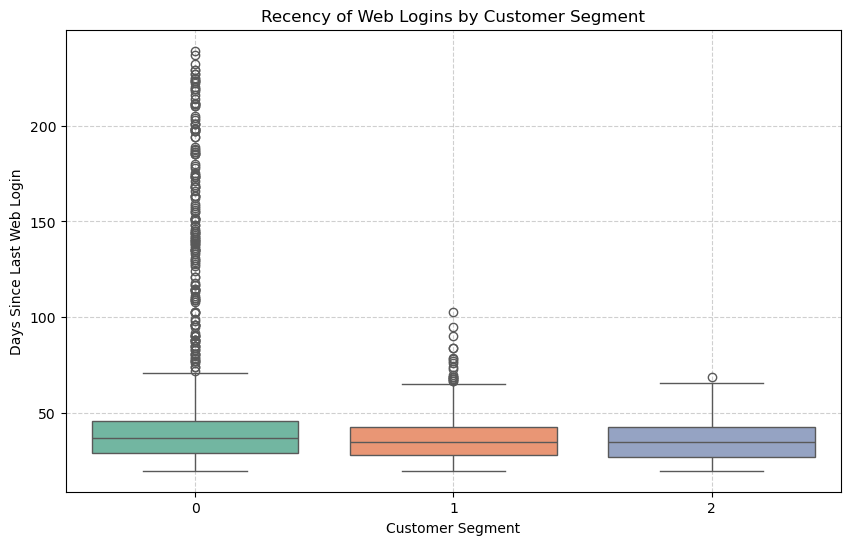

In [61]:
# Convert 'last_mobile_login' and 'last_web_login' to datetime and calculate days since last login
customer_data['days_since_last_mobile_login'] = (pd.to_datetime('today') - pd.to_datetime(customer_data['last_mobile_login'])).dt.days
customer_data['days_since_last_web_login'] = (pd.to_datetime('today') - pd.to_datetime(customer_data['last_web_login'])).dt.days

# Plotting recency of mobile logins (days since last mobile login) by segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='days_since_last_mobile_login', data=customer_data, palette='Set1')
plt.title('Recency of Mobile Logins by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Days Since Last Mobile Login')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plotting recency of web logins (days since last web login) by segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='days_since_last_web_login', data=customer_data, palette='Set2')
plt.title('Recency of Web Logins by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Days Since Last Web Login')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
